In [159]:
import pandas as pd
import numpy as np


import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA

## Exploration

In [160]:
df = pd.read_csv('ai4i2020.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


ID : identifiant  
product ID : Low Medium et High quality products  
air temperature  
Temperature d'activité  
Vitesse adtivité  
torque : force de rotation  
tool wear : usure  
Machone et failure et problemes : TWF= tool failure, HDF = heat dissipation, PWF = power failure, OSF = overstain failure, RNF = random failures  

In [161]:
#check duplicates
df_duplicates = df.duplicated().sum()
df_duplicates

0

In [162]:
#check valeurs manquantes
df_isna = df.isna().sum()
df_isna

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [164]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [165]:
df[df['Machine failure'] == 1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


In [166]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [167]:
#rename

rename_col = {
    'UID' : 'ID',
    'Product ID' : 'Product_ID',
    'Air temperature [K]' : 'Air_Temperature',
    'Process Temperature [K]' : 'Process_Temperature',
    'Torque [Nm]' : 'Torque',
    'Tool wear [min]' : 'Tool_Wear',
    'Machine failure' : 'Failure'
}

df.rename(rename_col, axis=1, inplace=True)



In [168]:
df

,UDI,Product_ID,Type,Air_Temperature,Process temperature [K],Rotational speed [rpm],Torque,Tool_Wear,Failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [169]:
df.set_index('UDI', inplace=True)

In [170]:
df

,Product_ID,Type,Air_Temperature,Process temperature [K],Rotational speed [rpm],Torque,Tool_Wear,Failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0


In [171]:
failures_sum = df.Failure.value_counts()
print('il y a',failures_sum[1], 'problemes')



il y a 339 problemes


In [172]:
df.describe()

,Air_Temperature,Process temperature [K],Rotational speed [rpm],Torque,Tool_Wear,Failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [173]:
# defintion de fonction pour avoir une colonne Failure_type en fonction des valeurs du dataset

def failure_type(row):
    if row['Failure'] == 0:
        return 'No_failure'
    else:
        max_value = max(row[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']])
        if max_value == row['TWF']:
            return 'TWF'
        elif max_value == row['HDF']:
            return 'HDF'
        elif max_value == row['PWF']:
            return 'PWF'
        elif max_value == row['OSF']:
            return 'OSF'
        else:
            return 'RNF'
        
df['Failure_type'] = df.apply(failure_type, axis=1)

df

,Product_ID,Type,Air_Temperature,Process temperature [K],Rotational speed [rpm],Torque,Tool_Wear,Failure,TWF,HDF,PWF,OSF,RNF,Failure_type
UDI,,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,No_failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,No_failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,No_failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,No_failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,No_failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,No_failure
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,No_failure
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,No_failure


In [174]:
import pandas as pd

# Define the dictionary mapping old column names to new column names
dic_rename = {
    'Process temperature [K]': 'Process_temperature',
    'Rotational speed [rpm]': 'Rotational_speed'
}

# Assuming df is your DataFrame
df.rename(columns=dic_rename, inplace=True)




In [175]:
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [176]:
df

,Product_ID,Type,Air_Temperature,Process_temperature,Rotational_speed,Torque,Tool_Wear,Failure,TWF,HDF,PWF,OSF,RNF,Failure_type
UDI,,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,No_failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,No_failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,No_failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,No_failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,No_failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,No_failure
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,No_failure
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,No_failure


## DataViz

In [177]:
# Distribution des classes
count_quality = df['Type'].value_counts()
fig = px.bar(x=count_quality.index, y=count_quality.values, color=count_quality.index)
fig.update_layout(title='Distribution des classes', xaxis_title='Type', yaxis_title='Nombre')
fig.show()


#### beaucoup de materiel qualifié de low  
#### Mauvaise distrib des classes  

In [178]:
import plotly.express as px

# Types de problemes
count_failures = df['Failure_type'].value_counts()

# Calculer les pourcentages
pourcentages = count_failures / count_failures.sum() * 100

# Créer le graphique à barres avec Plotly Express
fig = px.bar(x=count_failures.index, y=count_failures.values, color=count_failures.index, text=pourcentages.round(2).astype(str) + '%')

# Mettre à jour les paramètres de la figure
fig.update_layout(title='Types de problèmes', xaxis_title='Type', yaxis_title='Occurences')

# Afficher les pourcentages au-dessus des barres
fig.update_traces(textposition='outside')

# Afficher la figure
fig.show()


#### forte présence de no failures, ensuite la distribution est plutot equivalente

### Conclusion :
#### mauvaise distribution des classes + multi labels

In [179]:
df

,Product_ID,Type,Air_Temperature,Process_temperature,Rotational_speed,Torque,Tool_Wear,Failure,TWF,HDF,PWF,OSF,RNF,Failure_type
UDI,,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,No_failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,No_failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,No_failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,No_failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,No_failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,No_failure
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,No_failure
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,No_failure


In [180]:

df_failure_type = df.loc[df['Failure_type'] != "No Failure"]
proportions = df_failure_type['Failure_type'].value_counts(normalize=True)
fig = px.pie(proportions, values=proportions.values, names=proportions.index, title='Class Distribution')
fig.show()


In [181]:
df

,Product_ID,Type,Air_Temperature,Process_temperature,Rotational_speed,Torque,Tool_Wear,Failure,TWF,HDF,PWF,OSF,RNF,Failure_type
UDI,,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,No_failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,No_failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,No_failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,No_failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,No_failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,No_failure
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,No_failure
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,No_failure


In [182]:
import plotly.graph_objects as go

numeric_values = df[['Air_Temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_Wear']]
# Calculate correlation matrix
corr = numeric_values.corr()

# Create heatmap trace
heatmap_trace = go.Heatmap(z=corr.values,
                           x=corr.columns,
                           y=corr.columns,
                           colorscale='RdBu',
                           zmin=-1, zmax=1)

# Define layout
layout = go.Layout(title='Correlation of Numeric Values',
                   xaxis=dict(title='Features'),
                   yaxis=dict(title='Features'))

# Create figure
fig = go.Figure(data=[heatmap_trace], layout=layout)

# Show figure
fig.show()



#### Air_temp - Process_temp  
#### Torque - Rotational_speed negative corr

## Clean  
ajustement des valeurs sur l ensemble des colonnes numeriques


In [183]:
df

,Product_ID,Type,Air_Temperature,Process_temperature,Rotational_speed,Torque,Tool_Wear,Failure,TWF,HDF,PWF,OSF,RNF,Failure_type
UDI,,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,No_failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,No_failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,No_failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,No_failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,No_failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,No_failure
9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,No_failure
9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,No_failure


In [184]:
columns_to_drop = ['Failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Product_ID']
df.drop(columns=columns_to_drop, inplace=True, axis=1)


In [185]:
df

,Type,Air_Temperature,Process_temperature,Rotational_speed,Torque,Tool_Wear,Failure_type
UDI,,,,,,,
1,M,298.1,308.6,1551,42.8,0,No_failure
2,L,298.2,308.7,1408,46.3,3,No_failure
3,L,298.1,308.5,1498,49.4,5,No_failure
4,L,298.2,308.6,1433,39.5,7,No_failure
5,L,298.2,308.7,1408,40.0,9,No_failure
...,...,...,...,...,...,...,...
9996,M,298.8,308.4,1604,29.5,14,No_failure
9997,H,298.9,308.4,1632,31.8,17,No_failure
9998,M,299.0,308.6,1645,33.4,22,No_failure


In [186]:
#Definition des col num et cat
num_col = ['Air_Temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_Wear']
cat_col = ['Type', 'Failure_type']

# Define the pipelines for numeric and categorical transformations
num_pipeline = Pipeline([
    ('num_features', StandardScaler())
])
cat_pipeline = Pipeline([
    ('cat_features', OneHotEncoder())
])
# Create the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_pipeline, num_col),
    ('cat_trans', cat_pipeline, cat_col)
])
# Fit and transform the data
df_transformed = preprocessor.fit_transform(df)
# Converting the transformed data back to a dataframe for easier visualization
# The transformed data will have new column names, especially for the one hot encoded categories
encoded_feature_names = preprocessor.named_transformers_['cat_trans'].get_feature_names_out(cat_col)
new_column_names = list(num_col) + list(encoded_feature_names)
df_transformed = pd.DataFrame(df_transformed, columns=new_column_names)
df_transformed.head()

,Air_Temperature,Process_temperature,Rotational_speed,Torque,Tool_Wear,Type_H,Type_L,Type_M,Failure_type_HDF,Failure_type_No_failure,Failure_type_OSF,Failure_type_PWF,Failure_type_TWF
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


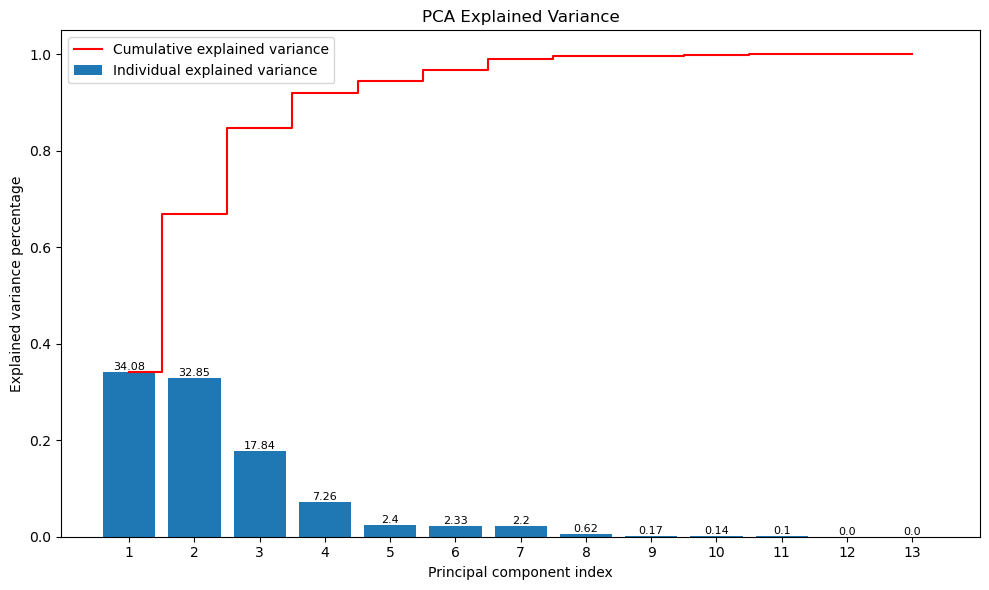

In [187]:
# Define PCA function
pca = PCA()
pca.fit(df_transformed)  # Assumindo que df_transformed é o seu DataFrame transformado

# PCA variance explained
exp_var = pca.explained_variance_ratio_
cum_exp_var = exp_var.cumsum()

# Number of components
n_pca_components = len(exp_var)

# Create the graphic
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, n_pca_components + 1), exp_var, align='center',
               label='Individual explained variance')
plt.step(range(1, n_pca_components + 1), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

# Add labels in each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), 
             va='bottom', ha='center', fontsize=8)

# Adjust others elements of the graphic
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, n_pca_components + 1)))
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()